<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Bengal/bjpBengal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 404 (delta 68), reused 20 (delta 4), pack-reused 231
Receiving objects: 100% (404/404), 19.51 MiB | 22.55 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [7]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"bjp bengal"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('bjp_bengal.csv',index = False)

Streaming output truncated to the last 5000 lines.
False
@rishibagree Possible hurdles against this Utopian idea:

➡️ Muslims vote en masse in favour of TMC to defeat BJP candidate..90 seats where they decide who wins 

➡️ Owaisi speaks Urdu..Language barriers make him a non starter in Bengal

➡️ Bengal votes on lines of Odisha..Modi PM, Mamata CM
AmanAgarwal0310
India
Twitter for Android
0
5
67
0
<--------------------------------------------------->
3046
2020-11-16 07:19:32
1328236242899648513
False
Book Review: Understanding the BJP's Rise in West Bengal https://t.co/c4ziPxybze via @thewire_in
sohini_6
Kolkata, India
Twitter Web App
1
4631
538
0
<--------------------------------------------------->
3047
2020-11-16 07:10:56
1328234079964196865
False
@Tejasvi_Surya Wishing you a very Happy Birthday Tejasvi. 💐💐 
In your leadership , BJYM and BJP will conquer Bengal.
Raj4NewIndia
India
Twitter for Android
0
695
2474
0
<--------------------------------------------------->
3048
2020-11-16 

In [8]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3398 non-null   datetime64[ns]
 1   Tweet_id   3398 non-null   int64         
 2   Verified   3398 non-null   bool          
 3   Tweet      3398 non-null   object        
 4   User       3398 non-null   object        
 5   Location   3398 non-null   object        
 6   Source     3398 non-null   object        
 7   Likes      3398 non-null   int64         
 8   Followers  3398 non-null   int64         
 9   Following  3398 non-null   int64         
 10  Retweets   3398 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 268.9+ KB


In [9]:
df.shape

(3398, 11)

In [13]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [14]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [15]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [16]:
df['Source'].value_counts()

Twitter for Android               1787
Twitter Web App                    880
Twitter for iPhone                 341
TweetDeck                          109
WordPress.com                       44
IFTTT                               40
Twitter Media Studio - LiveCut      39
Twitter Media Studio                21
cmssocialservice                    20
Twitter for iPad                    15
ht-twitter-handler                  12
Hootsuite Inc.                      10
namPublisher                         8
Hocalwire Social Share               8
NDTVfeed                             7
dlvr.it                              6
Republicworld                        6
Sarabangla                           4
ClarionIndia                         3
Devdiscourse News Desk               3
LinkedIn                             3
Periscope                            3
Pak Auto Poster                      2
Twitter for Mac                      2
Buffer                               2
ThreadReaderApp          

In [17]:
df['Location'].nunique()

687

In [18]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

3398

In [19]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


3346

In [20]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [21]:
df['Tweet'].duplicated().sum()

52

In [22]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(3346, 11)

In [23]:
df['Tweet'].duplicated().sum()

0

In [25]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [26]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [27]:
df.shape

(3346, 12)

In [28]:
df['Processed_Tweet']

0       BJP Lacks Faith in Its Leaders of West Bengal,...
1       @tripathisam2020 @AmitShah Hope she and her fa...
2       CPI (ML) Liberation general secretary Dipankar...
3       BJP Lacks Faith in Its Leaders of West Bengal,...
4       The ground worker in fact is in unenviable pos...
                              ...                        
3341    @news24tvchannel @IGuruPrakash @manakgupta Gur...
3342    @FullTosss @ANI When they won in 2004 and 2009...
3343    @amitmalviya @JPNadda @narendramodi @AmitShah ...
3344    @me_locket May the light of happiness and pros...
3345    @ANI Our Didi every year worships Maa Kali on ...
Name: Processed_Tweet, Length: 3346, dtype: object

In [29]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0       BJP Lacks Faith in Its Leaders of West Bengal,...
1       @tripathisam2020 @AmitShah Hope she and her fa...
2       CPI (ML) Liberation general secretary Dipankar...
3       BJP Lacks Faith in Its Leaders of West Bengal,...
4       The ground worker in fact is in unenviable pos...
                              ...                        
3341    @news24tvchannel @IGuruPrakash @manakgupta Gur...
3342    @FullTosss @ANI When they won in 2004 and 2009...
3343    @amitmalviya @JPNadda @narendramodi @AmitShah ...
3344    @me_locket May the light of happiness and pros...
3345    @ANI Our Didi every year worships Maa Kali on ...
Name: Processed_Tweet, Length: 3346, dtype: object

In [30]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0       BJP Lacks Faith in Its Leaders of West Bengal,...
1           Hope she and her family don't get killed l...
2       CPI (ML) Liberation general secretary Dipankar...
3       BJP Lacks Faith in Its Leaders of West Bengal,...
4       The ground worker in fact is in unenviable pos...
                              ...                        
3341          Guru Prakash ji is an excellent orator a...
3342        When they won in 2004 and 2009 at centre,w...
3343              Bengal, not an easy place2 win: 1)En...
3344      May the light of happiness and prosperity da...
3345      Our Didi every year worships Maa Kali on Diw...
Name: Processed_Tweet, Length: 3346, dtype: object

In [31]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0       BJP Lacks Faith in Its Leaders of West Bengal,...
1           Hope she and her family don't get killed l...
2       CPI (ML) Liberation general secretary Dipankar...
3       BJP Lacks Faith in Its Leaders of West Bengal,...
4       The ground worker in fact is in unenviable pos...
                              ...                        
3341          Guru Prakash ji is an excellent orator a...
3342        When they won in 2004 and 2009 at centre,w...
3343              Bengal, not an easy place2 win: 1)En...
3344      May the light of happiness and prosperity da...
3345      Our Didi every year worships Maa Kali on Diw...
Name: Processed_Tweet, Length: 3346, dtype: object

In [32]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0       BJP Lacks Faith in Its Leaders of West Bengal,...
1           Hope she and her family don't get killed l...
2       CPI (ML) Liberation general secretary Dipankar...
3       BJP Lacks Faith in Its Leaders of West Bengal,...
4       The ground worker in fact is in unenviable pos...
                              ...                        
3341          Guru Prakash ji is an excellent orator a...
3342        When they won in 2004 and 2009 at centre,w...
3343              Bengal, not an easy place2 win: 1)En...
3344      May the light of happiness and prosperity da...
3345      Our Didi every year worships Maa Kali on Diw...
Name: Processed_Tweet, Length: 3346, dtype: object

In [34]:
!pip install tweet-preprocessor

In [35]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0       BJP Lacks Faith in Its Leaders of West Bengal,...
1       Hope she and her family don't get killed like ...
2       CPI (ML) Liberation general secretary Dipankar...
3       BJP Lacks Faith in Its Leaders of West Bengal,...
4       The ground worker in fact is in unenviable pos...
                              ...                        
3341    Guru Prakash ji is an excellent orator and ver...
3342    When they won in and at centre,when Akhilesh w...
3343    Bengal, not an easy place2 win: )Ensure cadres...
3344    May the light of happiness and prosperity dawn...
3345    Our Didi every year worships Maa Kali on Diwal...
Name: Processed_Tweet, Length: 3346, dtype: object

In [36]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0       BJP Lacks Faith in Its Leaders of West Bengal ...
1       Hope she and her family don t get killed like ...
2       CPI  ML  Liberation general secretary Dipankar...
3       BJP Lacks Faith in Its Leaders of West Bengal ...
4       The ground worker in fact is in unenviable pos...
                              ...                        
3341    Guru Prakash ji is an excellent orator and ver...
3342    When they won in and at centre when Akhilesh w...
3343    Bengal  not an easy place  win   Ensure cadres...
3344    May the light of happiness and prosperity dawn...
3345    Our Didi every year worships Maa Kali on Diwal...
Name: Processed_Tweet, Length: 3346, dtype: object

In [37]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0       bjp lacks faith in its leaders of west bengal ...
1       hope she and her family don t get killed like ...
2       cpi  ml  liberation general secretary dipankar...
3       bjp lacks faith in its leaders of west bengal ...
4       the ground worker in fact is in unenviable pos...
                              ...                        
3341    guru prakash ji is an excellent orator and ver...
3342    when they won in and at centre when akhilesh w...
3343    bengal  not an easy place  win   ensure cadres...
3344    may the light of happiness and prosperity dawn...
3345    our didi every year worships maa kali on diwal...
Name: Processed_Tweet, Length: 3346, dtype: object

In [38]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'in bjp won only seats in west bengalab to jeetne ka candidate haito wb me sirf saal me hualet s see tn me kitna time lagta hai'

In [39]:
df['User'].value_counts()

IndiaToday         46
ram03073962        46
Ash_Rokzz23        39
TimesNow           34
WakeUpHindu        31
                   ..
RamuRaghavan23      1
JAY_VARMA_1         1
iamZzubair          1
ImranKh59796848     1
BibiPakhii          1
Name: User, Length: 2176, dtype: int64

In [40]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


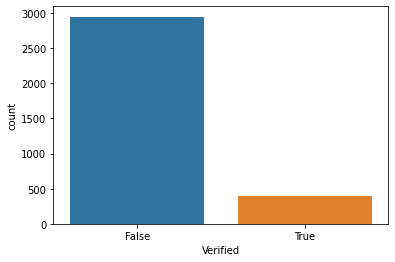

In [41]:
bar = sns.countplot(df['Verified'])

In [42]:
df['Verified'].value_counts()

False    2947
True      399
Name: Verified, dtype: int64

In [43]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

IndiaToday       46
TimesNow         34
CNNnews18        21
htTweets         16
ndtv             13
                 ..
SandhyaTudu       1
PTI_News          1
IYCWestBengal     1
paranjoygt        1
ani_digital       1
Name: User, Length: 115, dtype: int64

In [45]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({14: 48,
         15: 223,
         16: 316,
         17: 380,
         18: 923,
         19: 535,
         20: 430,
         21: 491})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

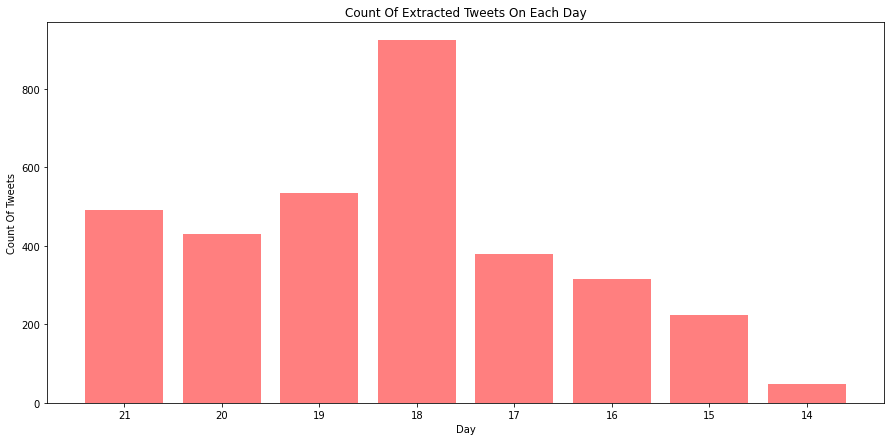

In [46]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [47]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 25,
         1: 48,
         2: 79,
         3: 135,
         4: 127,
         5: 143,
         6: 170,
         7: 200,
         8: 204,
         9: 225,
         10: 200,
         11: 186,
         12: 230,
         13: 200,
         14: 243,
         15: 191,
         16: 196,
         17: 188,
         18: 124,
         19: 105,
         20: 49,
         21: 28,
         22: 27,
         23: 23})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

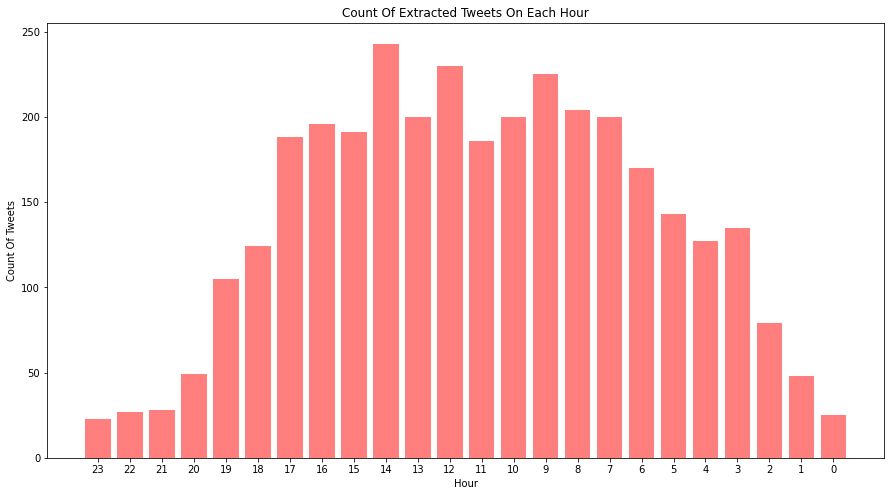

In [48]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [49]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['needn', "won't", 'whom', 'its', 'is', 'just', 'ourselves', 'your', 's', 'same', 'as', 'o', 'now', 'i', 'don', 'it', 'him', 'over', 'theirs', 'he', 'but', 'herself', 'do', 'or', "mustn't", 'those', 'haven', 't', 'further', 'hadn', 'yourselves', 'didn', 'shouldn', 'myself', 'not', 'aren', 'in', "weren't", 'on', 'does', 'more', "you're", 'most', 'below', 'can', 'when', 'to', 'y', 'because', 'won', "didn't", 'and', 'yours', 'hers', 'so', "you'll", 'under', "it's", 'once', 'isn', 'ours', 'them', 'before', 'between', 'these', 'd', 'mustn', "hadn't", 'an', 'very', 'was', 'about', 'are', 'doesn', 'our', "doesn't", 'did', 'where', 'wasn', 'down', 'be', 'am', 'then', 'why', 'any', 'up', 'too', 'his', 've', 'what', 'shan', 'she', 'll', 'themselves', 'had', "aren't", "you've", 'from', 'other', 'that', "you'd", 'who', 'above', 'himself', "hasn't", 'being', 'some', 'which', 're', 'having', 'has', 'a', 'm', "don't", 'me', 'yourself', 'their', 'we', 'off', 'her', "couldn't", 'ma', 'few', "needn't", 

In [53]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0       bjp lacks faith leaders west bengal importing ...
1       hope family get killed like bjp karyakartas pa...
2       cpi ml liberation general secretary dipankar b...
3       bjp lacks faith leaders west bengal importing ...
4       ground worker fact unenviable position mr siba...
                              ...                        
3341    guru prakash ji excellent orator clear communi...
3342    centre akhilesh u p congress p rajasthan chhat...
3343    bengal easy place win ensure cadres r killed f...
3344    may light happiness prosperity dawn bengal nex...
3345    didi every year worships maa kali diwali puja ...
Name: Processed_Tweet, Length: 3346, dtype: object

In [54]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0       [bjp, lacks, faith, leaders, west, bengal, imp...
1       [hope, family, get, killed, like, bjp, karyaka...
2       [cpi, ml, liberation, general, secretary, dipa...
3       [bjp, lacks, faith, leaders, west, bengal, imp...
4       [ground, worker, fact, unenviable, position, m...
                              ...                        
3341    [guru, prakash, ji, excellent, orator, clear, ...
3342    [centre, akhilesh, u, p, congress, p, rajastha...
3343    [bengal, easy, place, win, ensure, cadres, r, ...
3344    [may, light, happiness, prosperity, dawn, beng...
3345    [didi, every, year, worships, maa, kali, diwal...
Name: Processed_Tweet, Length: 3346, dtype: object

In [55]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0       [bjp, lack, faith, leader, west, bengal, impor...
1       [hope, famili, get, kill, like, bjp, karyakart...
2       [cpi, ml, liber, gener, secretari, dipankar, b...
3       [bjp, lack, faith, leader, west, bengal, impor...
4       [ground, worker, fact, unenvi, posit, mr, siba...
                              ...                        
3341    [guru, prakash, ji, excel, orat, clear, commun...
3342    [centr, akhilesh, u, p, congress, p, rajasthan...
3343    [bengal, easi, place, win, ensur, cadr, r, kil...
3344    [may, light, happi, prosper, dawn, bengal, nex...
3345    [didi, everi, year, worship, maa, kali, diwali...
Name: Processed_Tweet, Length: 3346, dtype: object

In [56]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:56:32,1330299085367222274,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",younews_in,India,dlvr.it,0,867,4,0,"[bjp, lack, faith, leader, west, bengal, impor..."
1,2020-11-21 23:55:56,1330298934988857348,False,@tripathisam2020 @AmitShah Hope she and her fa...,theBongSanghi,,Twitter Web App,1,21,122,0,"[hope, famili, get, kill, like, bjp, karyakart..."
2,2020-11-21 23:45:00,1330296182409555968,True,CPI (ML) Liberation general secretary Dipankar...,CNNnews18,India,TweetDeck,7,4545018,415,0,"[cpi, liber, gener, secretari, dipankar, bhatt..."
3,2020-11-21 23:44:34,1330296072636403717,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, lack, faith, leader, west, bengal, impor..."
4,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,40,5,0,"[ground, worker, fact, unenvi, posit, sibal, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3341,2020-11-14 15:44:22,1327638512309440513,False,@news24tvchannel @IGuruPrakash @manakgupta Gur...,Krish23600960,,Twitter for Android,0,20,57,0,"[guru, prakash, excel, orat, clear, commun, bj..."
3342,2020-11-14 15:43:09,1327638208260173825,False,@FullTosss @ANI When they won in 2004 and 2009...,AniruddhaRaje1,,Twitter for Android,0,211,467,0,"[centr, akhilesh, congress, rajasthan, chhatti..."
3343,2020-11-14 15:38:38,1327637071628931072,False,@amitmalviya @JPNadda @narendramodi @AmitShah ...,ZeRoBiAsBlUnT,,Twitter for Android,0,301,214,0,"[bengal, easi, place, win, ensur, cadr, kill, ..."
3344,2020-11-14 15:30:06,1327634921829978113,False,@me_locket May the light of happiness and pros...,happystate24,"Pathanamthitta, Trivandrum.",Twitter for Android,1,242,675,0,"[may, light, happi, prosper, dawn, bengal, nex..."


In [57]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

55604

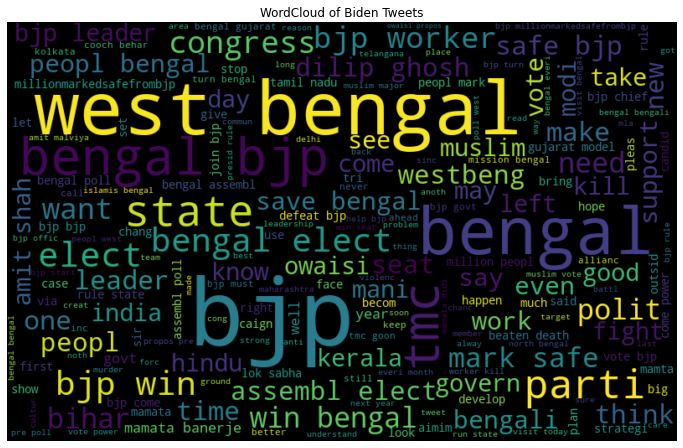

In [58]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Biden Tweets")
plt.show()

In [59]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

3346

In [60]:
len(text)

55604

In [61]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 1566
Negative Tweets: 464
Neutral Tweets 1316


In [62]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [66]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.127,0.718,0.155,0.1280
1,0.412,0.309,0.278,-0.5574
2,0.000,1.000,0.000,0.0000
3,0.152,0.662,0.185,0.1280
4,0.000,0.912,0.088,0.3612
...,...,...,...,...
3341,0.000,0.797,0.203,0.6808
3342,0.138,0.667,0.195,0.2732
3343,0.173,0.547,0.280,0.5994
3344,0.000,1.000,0.000,0.0000


In [67]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.127,0.718,0.155,0.1280,Positive
1,0.412,0.309,0.278,-0.5574,Negative
2,0.000,1.000,0.000,0.0000,Neutral
3,0.152,0.662,0.185,0.1280,Positive
4,0.000,0.912,0.088,0.3612,Positive


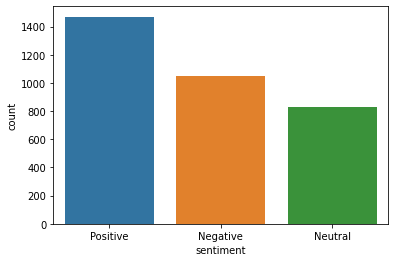

In [68]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [70]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Bengal/bjp_bengal.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

6523

In [71]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [73]:
word_emotion=dict()
for i in range(0,6523):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [80]:
from numpy import nan
nan == nan


False

In [81]:
for i in range(0,3346):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [82]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

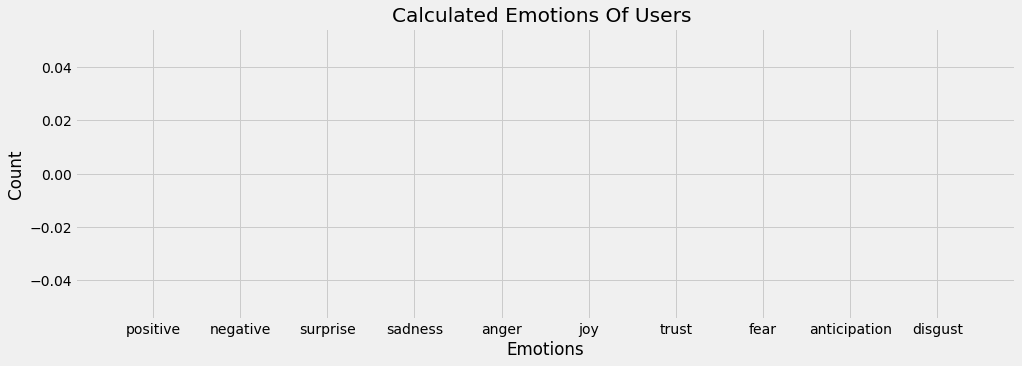

In [83]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [84]:
df.Location  = df.Location.fillna('USA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [85]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                                 1072
India                             510
Kolkata, India                    148
New Delhi, India                   98
Mumbai, India                      43
                                 ... 
lives in south ext ii               1
Siliguri, West Bengal, India        1
Asansol, Bharat                     1
DELHI/NCR                           1
Delhi-NCR                           1
Name: Location, Length: 678, dtype: int64

In [86]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:56:32,1330299085367222274,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",younews_in,India,dlvr.it,0,867,4,0,"[bjp, lack, faith, leader, west, bengal, impor...",India
1,2020-11-21 23:55:56,1330298934988857348,False,@tripathisam2020 @AmitShah Hope she and her fa...,theBongSanghi,,Twitter Web App,1,21,122,0,"[hope, famili, get, kill, like, bjp, karyakart...",
2,2020-11-21 23:45:00,1330296182409555968,True,CPI (ML) Liberation general secretary Dipankar...,CNNnews18,India,TweetDeck,7,4545018,415,0,"[cpi, liber, gener, secretari, dipankar, bhatt...",India
3,2020-11-21 23:44:34,1330296072636403717,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, lack, faith, leader, west, bengal, impor...",Mumbai
4,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,40,5,0,"[ground, worker, fact, unenvi, posit, sibal, s...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,2020-11-14 15:44:22,1327638512309440513,False,@news24tvchannel @IGuruPrakash @manakgupta Gur...,Krish23600960,,Twitter for Android,0,20,57,0,"[guru, prakash, excel, orat, clear, commun, bj...",
3342,2020-11-14 15:43:09,1327638208260173825,False,@FullTosss @ANI When they won in 2004 and 2009...,AniruddhaRaje1,,Twitter for Android,0,211,467,0,"[centr, akhilesh, congress, rajasthan, chhatti...",
3343,2020-11-14 15:38:38,1327637071628931072,False,@amitmalviya @JPNadda @narendramodi @AmitShah ...,ZeRoBiAsBlUnT,,Twitter for Android,0,301,214,0,"[bengal, easi, place, win, ensur, cadr, kill, ...",
3344,2020-11-14 15:30:06,1327634921829978113,False,@me_locket May the light of happiness and pros...,happystate24,"Pathanamthitta, Trivandrum.",Twitter for Android,1,242,675,0,"[may, light, happi, prosper, dawn, bengal, nex...",Pathanamthitta


In [87]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [88]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 23:56:32,1330299085367222274,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",younews_in,India,dlvr.it,0,867,4,0,"[bjp, lack, faith, leader, west, bengal, impor...",India,Positive,21
1,2020-11-21 23:55:56,1330298934988857348,False,@tripathisam2020 @AmitShah Hope she and her fa...,theBongSanghi,,Twitter Web App,1,21,122,0,"[hope, famili, get, kill, like, bjp, karyakart...",,Negative,21
2,2020-11-21 23:45:00,1330296182409555968,True,CPI (ML) Liberation general secretary Dipankar...,CNNnews18,India,TweetDeck,7,4545018,415,0,"[cpi, liber, gener, secretari, dipankar, bhatt...",India,Neutral,21
3,2020-11-21 23:44:34,1330296072636403717,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, lack, faith, leader, west, bengal, impor...",Mumbai,Positive,21
4,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,40,5,0,"[ground, worker, fact, unenvi, posit, sibal, s...",,Positive,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


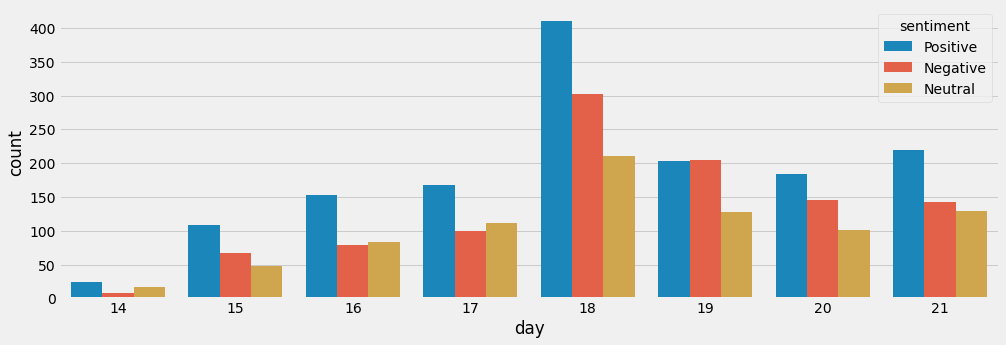

In [89]:
sns.countplot(df['day'],hue = df['sentiment'])

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [91]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 23:56:32,1330299085367222274,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",younews_in,India,dlvr.it,0,867,4,0,"[bjp, lack, faith, leader, west, bengal, impor...",India,Positive,21,2
1,2020-11-21 23:55:56,1330298934988857348,False,@tripathisam2020 @AmitShah Hope she and her fa...,theBongSanghi,,Twitter Web App,1,21,122,0,"[hope, famili, get, kill, like, bjp, karyakart...",,Negative,21,0
2,2020-11-21 23:45:00,1330296182409555968,True,CPI (ML) Liberation general secretary Dipankar...,CNNnews18,India,TweetDeck,7,4545018,415,0,"[cpi, liber, gener, secretari, dipankar, bhatt...",India,Neutral,21,1
3,2020-11-21 23:44:34,1330296072636403717,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, lack, faith, leader, west, bengal, impor...",Mumbai,Positive,21,2
4,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,40,5,0,"[ground, worker, fact, unenvi, posit, sibal, s...",,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,2020-11-14 15:44:22,1327638512309440513,False,@news24tvchannel @IGuruPrakash @manakgupta Gur...,Krish23600960,,Twitter for Android,0,20,57,0,"[guru, prakash, excel, orat, clear, commun, bj...",,Positive,14,2
3342,2020-11-14 15:43:09,1327638208260173825,False,@FullTosss @ANI When they won in 2004 and 2009...,AniruddhaRaje1,,Twitter for Android,0,211,467,0,"[centr, akhilesh, congress, rajasthan, chhatti...",,Positive,14,2
3343,2020-11-14 15:38:38,1327637071628931072,False,@amitmalviya @JPNadda @narendramodi @AmitShah ...,ZeRoBiAsBlUnT,,Twitter for Android,0,301,214,0,"[bengal, easi, place, win, ensur, cadr, kill, ...",,Positive,14,2
3344,2020-11-14 15:30:06,1327634921829978113,False,@me_locket May the light of happiness and pros...,happystate24,"Pathanamthitta, Trivandrum.",Twitter for Android,1,242,675,0,"[may, light, happi, prosper, dawn, bengal, nex...",Pathanamthitta,Neutral,14,1


In [92]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [94]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [95]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [96]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.8197211155378487
Precision Score:  0.8197211155378487
Recall Score:  0.8197211155378487
F1 Score:  0.8197211155378487


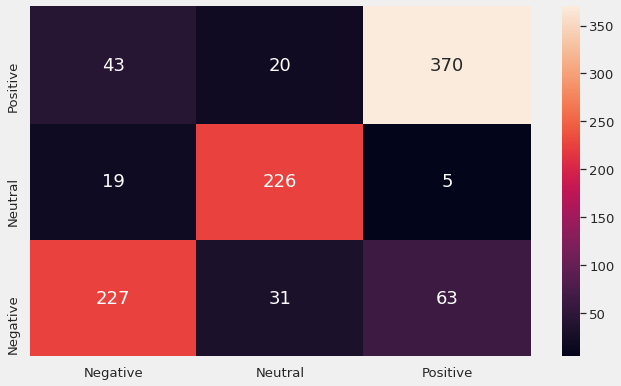

In [97]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [98]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [99]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [100]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5149318057828696
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [101]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.48804780876494025
Precision Score:  0.48804780876494025
Recall Score:  0.48804780876494025
F1 Score:  0.48804780876494025


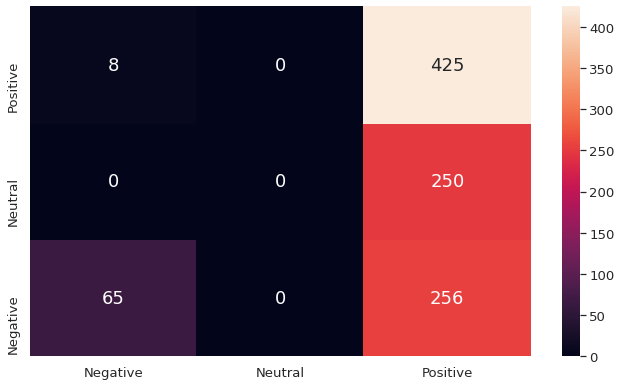

In [102]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [104]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [105]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.7888446215139442
Precision Score:  0.7888446215139442
Recall Score:  0.7888446215139442
F1 Score:  0.7888446215139441


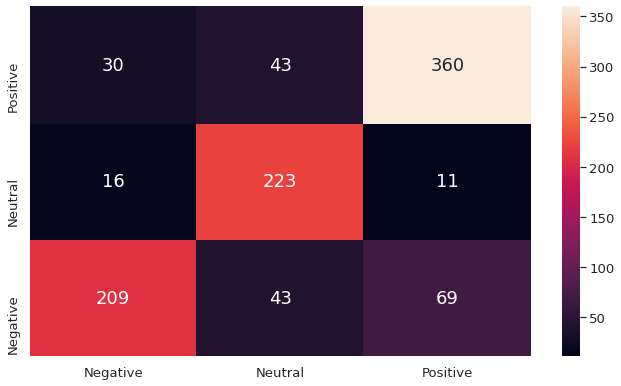

In [106]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [107]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [108]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, max_depth=1, criterion=entropy ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, max_depth=1, criterion=entropy, score=0.446, total=   1.5s
[CV] n_estimators=700, max_depth=1, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=700, max_depth=1, criterion=entropy, score=0.452, total=   1.6s
[CV] n_estimators=700, max_depth=1, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=700, max_depth=1, criterion=entropy, score=0.447, total=   1.5s
[CV] n_estimators=700, max_depth=1, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=700, max_depth=1, criterion=entropy, score=0.447, total=   1.5s
[CV] n_estimators=700, max_depth=1, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.1s remaining:    0.0s


[CV]  n_estimators=700, max_depth=1, criterion=entropy, score=0.442, total=   1.5s
[CV] n_estimators=500, max_depth=17, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s remaining:    0.0s


[CV]  n_estimators=500, max_depth=17, criterion=gini, score=0.665, total=   3.6s
[CV] n_estimators=500, max_depth=17, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.2s remaining:    0.0s


[CV]  n_estimators=500, max_depth=17, criterion=gini, score=0.652, total=   3.6s
[CV] n_estimators=500, max_depth=17, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.8s remaining:    0.0s


[CV]  n_estimators=500, max_depth=17, criterion=gini, score=0.639, total=   3.7s
[CV] n_estimators=500, max_depth=17, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.6s remaining:    0.0s


[CV]  n_estimators=500, max_depth=17, criterion=gini, score=0.647, total=   3.7s
[CV] n_estimators=500, max_depth=17, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   22.2s remaining:    0.0s


[CV]  n_estimators=500, max_depth=17, criterion=gini, score=0.611, total=   3.6s
[CV] n_estimators=100, max_depth=1, criterion=gini ...................
[CV]  n_estimators=100, max_depth=1, criterion=gini, score=0.443, total=   0.2s
[CV] n_estimators=100, max_depth=1, criterion=gini ...................
[CV]  n_estimators=100, max_depth=1, criterion=gini, score=0.452, total=   0.2s
[CV] n_estimators=100, max_depth=1, criterion=gini ...................
[CV]  n_estimators=100, max_depth=1, criterion=gini, score=0.442, total=   0.2s
[CV] n_estimators=100, max_depth=1, criterion=gini ...................
[CV]  n_estimators=100, max_depth=1, criterion=gini, score=0.442, total=   0.2s
[CV] n_estimators=100, max_depth=1, criterion=gini ...................
[CV]  n_estimators=100, max_depth=1, criterion=gini, score=0.442, total=   0.2s
[CV] n_estimators=600, max_depth=8, criterion=entropy ................
[CV]  n_estimators=600, max_depth=8, criterion=entropy, score=0.586, total=   3.0s
[CV] n_est

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


0.6566890820622164
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [110]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6304780876494024
Precision Score:  0.6304780876494024
Recall Score:  0.6304780876494024
F1 Score:  0.6304780876494024


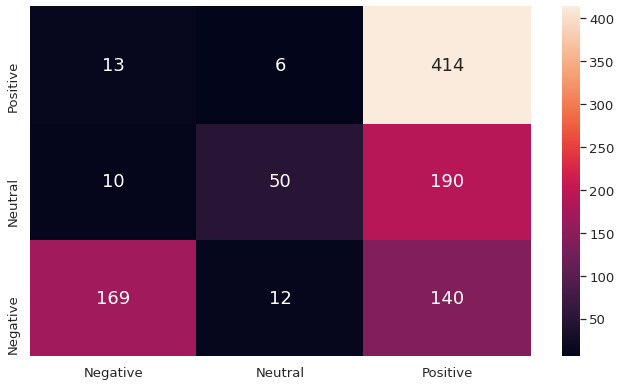

In [111]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [112]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.7171314741035857
Precision Score:  0.7171314741035857
Recall Score:  0.7171314741035857
F1 Score:  0.7171314741035857


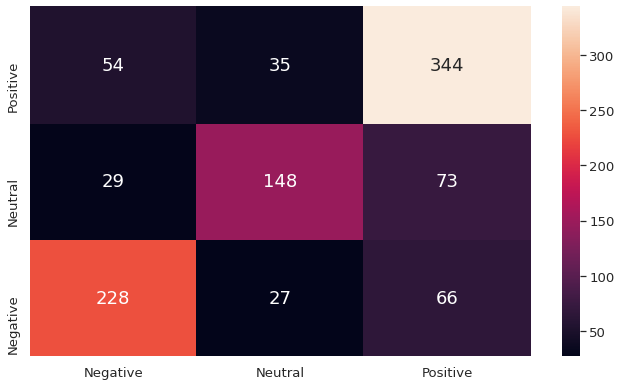

In [113]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [114]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [115]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.7139170758319695
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [116]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.7171314741035857
Precision Score:  0.7171314741035857
Recall Score:  0.7171314741035857
F1 Score:  0.7171314741035857


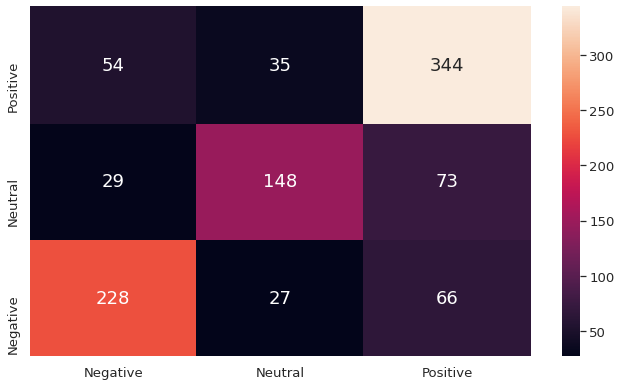

In [117]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

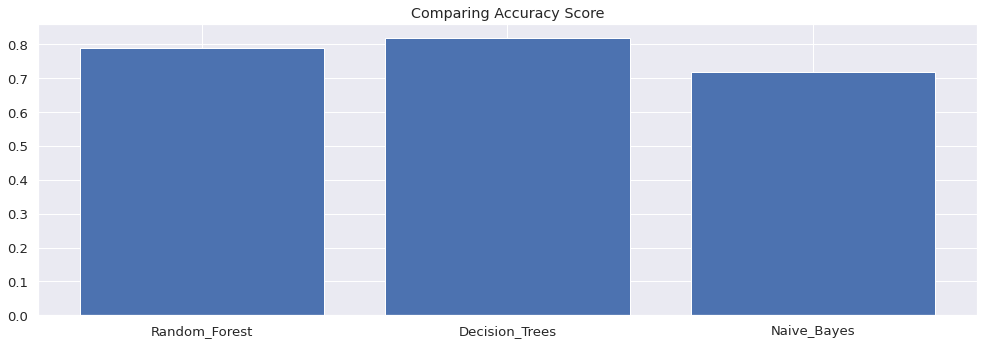

In [118]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

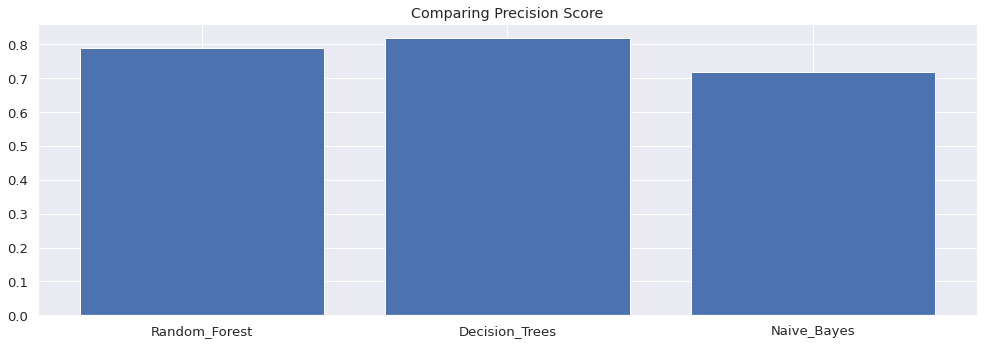

In [119]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

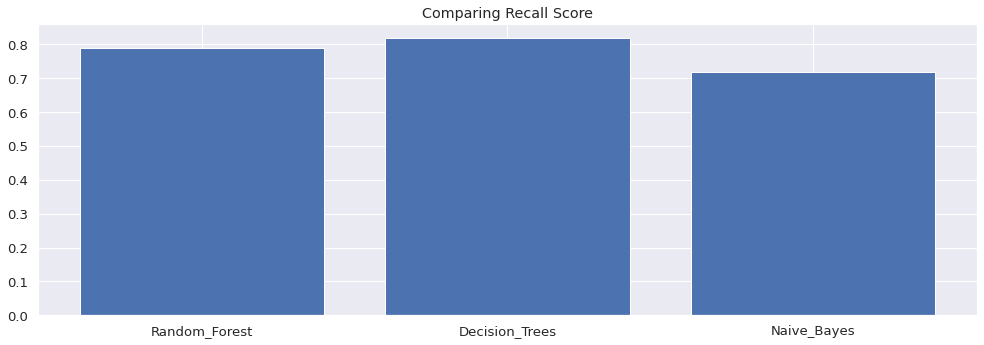

In [120]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

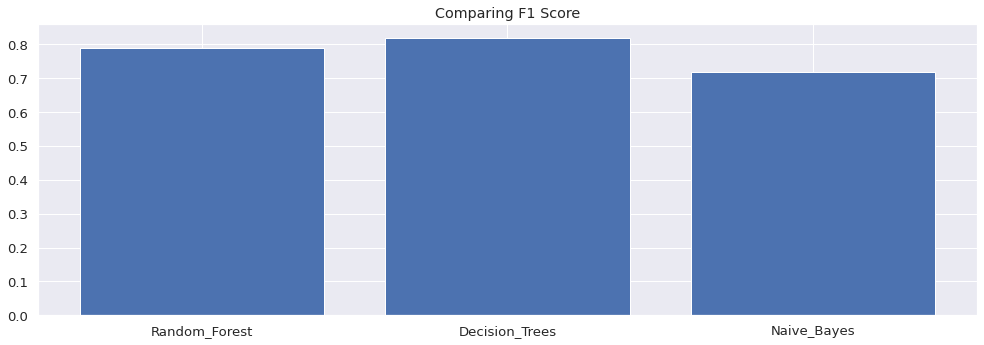

In [121]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()